In [1]:
# Notwendige Bibliotheken importieren
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV

## Retrieve Data

In [2]:
# Laden der Daten
train = pd.read_csv('train.csv')

## Clean & Explore

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Fehlende Werte
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna('S')
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())

# Zuordnung kategorischer Variablen zu ganzen Zahlen
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0}).astype(int)
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
train['Embarked'] = train['Embarked'].map(embarked_mapping).astype(int)

## Prepare & Transform

In [5]:
# Vereinfachtes Feature-Engineering
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

In [6]:
# Vorbereiten der Daten für die Modellierung
X = train.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
y = train['Survived']

In [7]:
# Aufteilung der Daten in Trainings- und Testsätze
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Develop & Train Model

In [8]:
# Definieren und Anpassen des Entscheidungsbaummodells
model1 = tree.DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [9]:
model2 = RandomForestClassifier(random_state=1)  
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [10]:
# XGBoost Classifier
model3 = xgb.XGBClassifier(random_state=1)
model3.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

## Validate & Evaluate Model

In [11]:
# Vorhersagen für den Testsatz treffen
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

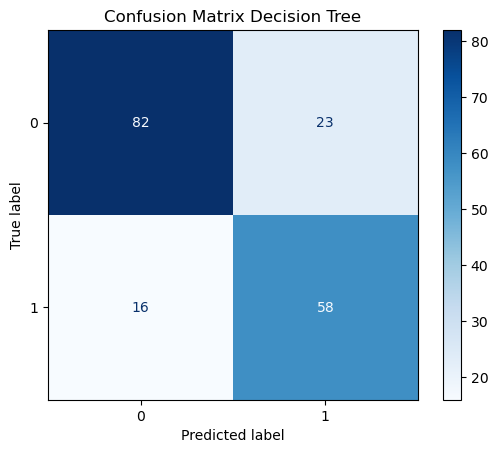

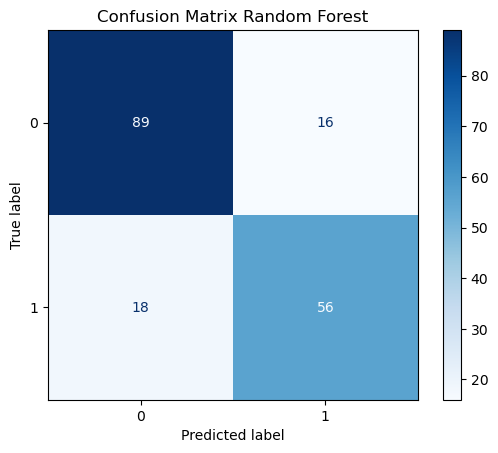

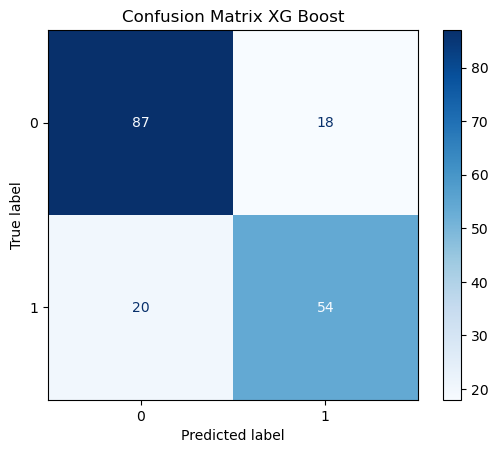

In [12]:
# Konfusionsmatrix für erstes Modell
conf_matrix = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Decision Tree')
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Random Forest')
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix XG Boost')
plt.show()

In [13]:
# Berechnen der Metriken für jede Klasse und zusammengefasst
report1 = classification_report(y_test, y_pred1, target_names=['Gestorben', 'Überlebt'])

# Drucken des Berichts
print("Klassifikationsbericht Entscheidungsbaum")
print(report1)

# Berechnen der Metriken für jede Klasse und zusammengefasst
report2 = classification_report(y_test, y_pred2, target_names=['Gestorben', 'Überlebt'])

# Drucken des Berichts
print("Klassifikationsbericht Random Forest")
print(report2)

# Berechnen der Metriken für jede Klasse und zusammengefasst
report3 = classification_report(y_test, y_pred3, target_names=['Gestorben', 'Überlebt'])

# Drucken des Berichts
print("Klassifikationsbericht XG Boost")
print(report3)

Klassifikationsbericht Entscheidungsbaum
              precision    recall  f1-score   support

   Gestorben       0.84      0.78      0.81       105
    Überlebt       0.72      0.78      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179

Klassifikationsbericht Random Forest
              precision    recall  f1-score   support

   Gestorben       0.83      0.85      0.84       105
    Überlebt       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Klassifikationsbericht XG Boost
              precision    recall  f1-score   support

   Gestorben       0.81      0.83      0.82       105
    Überlebt       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg      

## Validierungskurven 

In [14]:
from sklearn.model_selection import validation_curve

In [15]:
def plot_validation_curve(estimator, title, X, y, param_name, param_range, cv=5, scoring='accuracy'):
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.plot(param_range, train_scores_mean, label='Training score', marker='o')
    plt.plot(param_range, test_scores_mean, label='Cross-validation score', marker='o')
    plt.xlabel(param_name)
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

### Validierungskurven Entscheidungsbaum

In [16]:
estimator = model1

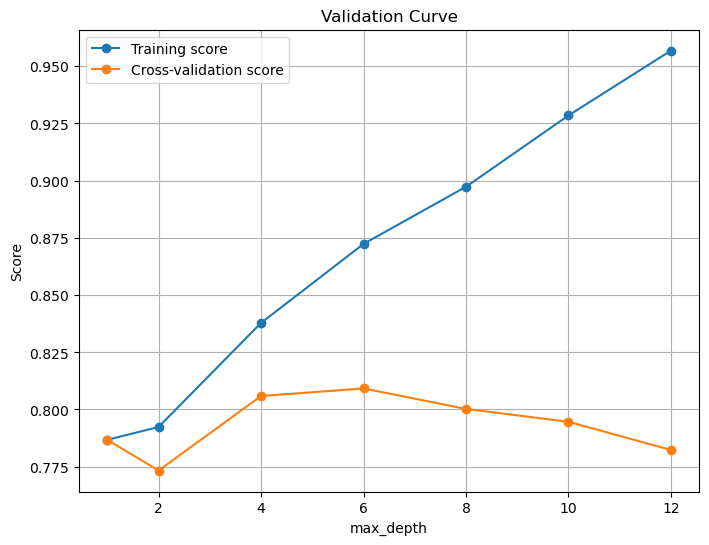

In [17]:
param_name = 'max_depth'
param_range = [1, 2, 4, 6, 8, 10, 12]

plot_validation_curve(estimator, "Validation Curve", X, y, param_name, param_range)

In [18]:
# Generate the training and test scores
train_scores, test_scores = validation_curve(
    estimator, X, y, param_name=param_name, param_range=param_range,
    cv=5, scoring='accuracy', n_jobs=-1
)

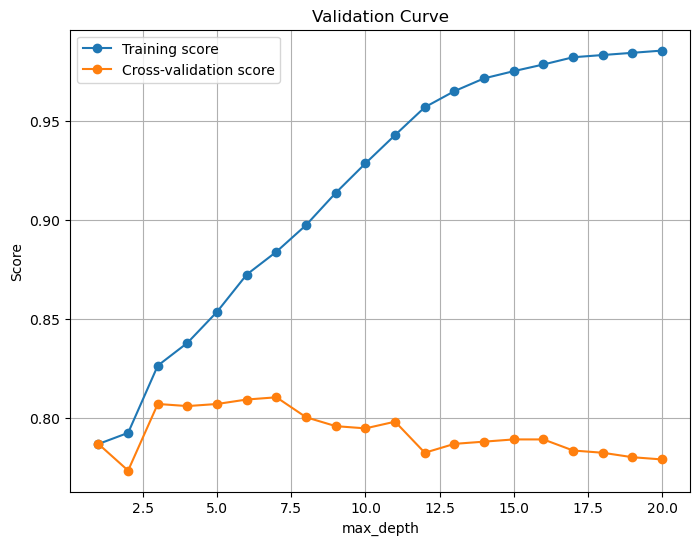

In [19]:
param_name = 'max_depth'
param_range = np.arange(1, 21)  # Exploring depths from 1 to 20

plot_validation_curve(estimator, "Validation Curve", X, y, param_name, param_range)

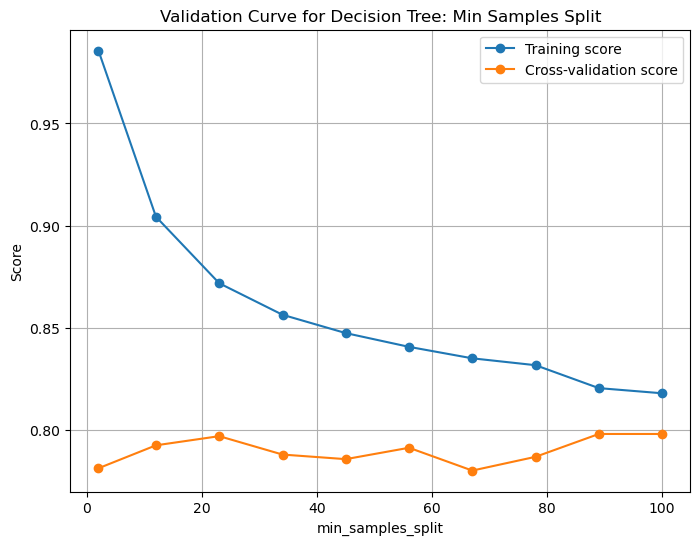

In [20]:
# Example: Exploring 'min_samples_split'
param_name = 'min_samples_split'
param_range = np.linspace(2, 100, 10, dtype=int)  # Exploring splits from 2 to 100 in 10 steps

plot_validation_curve(estimator, "Validation Curve for Decision Tree: Min Samples Split", X, y, param_name, param_range)

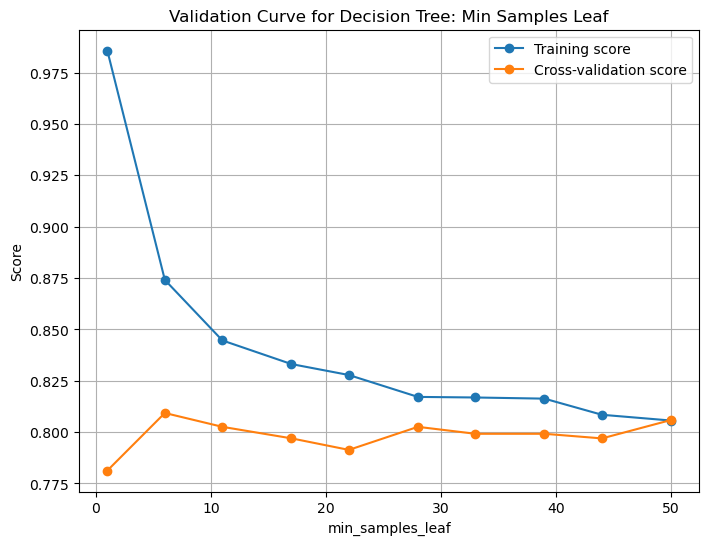

In [21]:
# Example: Exploring 'min_samples_leaf'
param_name = 'min_samples_leaf'
param_range = np.linspace(1, 50, 10, dtype=int)  # Leaf sizes from 1 to 50

plot_validation_curve(estimator, "Validation Curve for Decision Tree: Min Samples Leaf", X, y, param_name, param_range)

### Validierungskurven Random Forest

In [22]:
estimator = model2

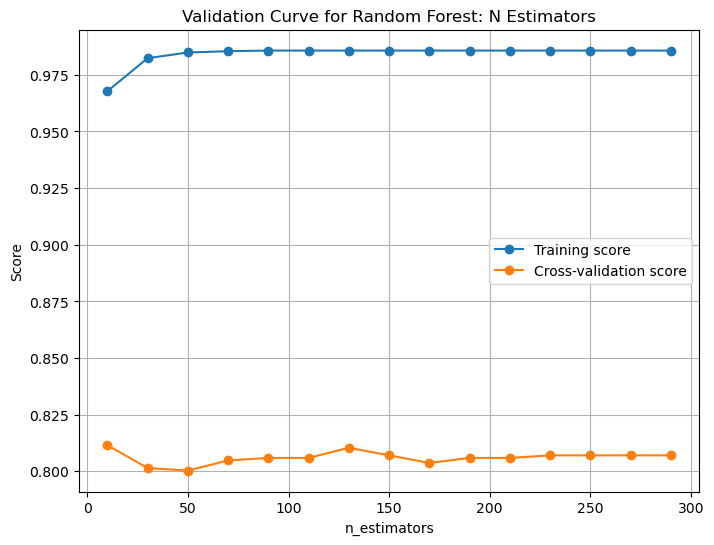

In [23]:
# Example setup for 'n_estimators'
param_name = 'n_estimators'
param_range = np.arange(10, 300, 20)  # Number of trees from 10 to 200 in steps of 20

plot_validation_curve(estimator, "Validation Curve for Random Forest: N Estimators", X, y, param_name, param_range)


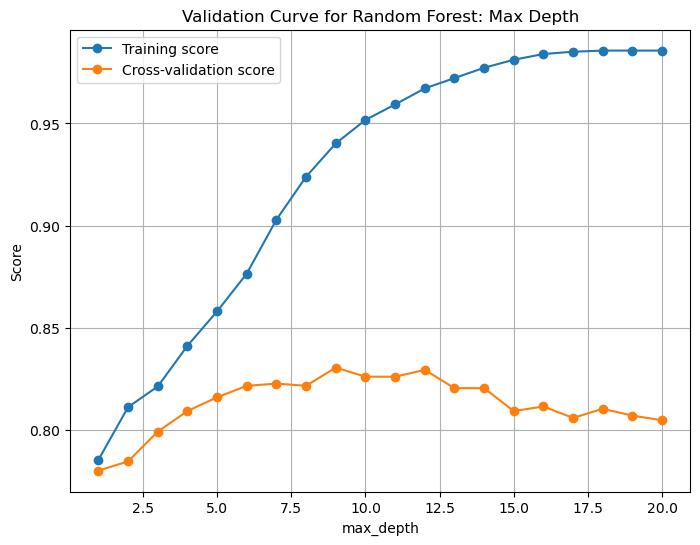

In [24]:
param_name = 'max_depth'
param_range = np.arange(1, 21)  # Depths from 1 to 20

plot_validation_curve(estimator, "Validation Curve for Random Forest: Max Depth", X, y, param_name, param_range)

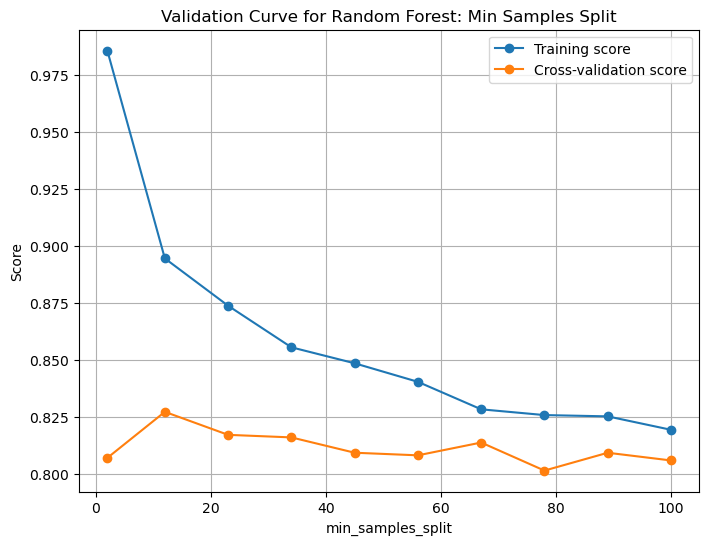

In [25]:
# Example setup for 'min_samples_split'
param_name = 'min_samples_split'
param_range = np.linspace(2, 100, 10, dtype=int)  # From 2 to 100 in 10 steps

plot_validation_curve(estimator, "Validation Curve for Random Forest: Min Samples Split", X, y, param_name, param_range)


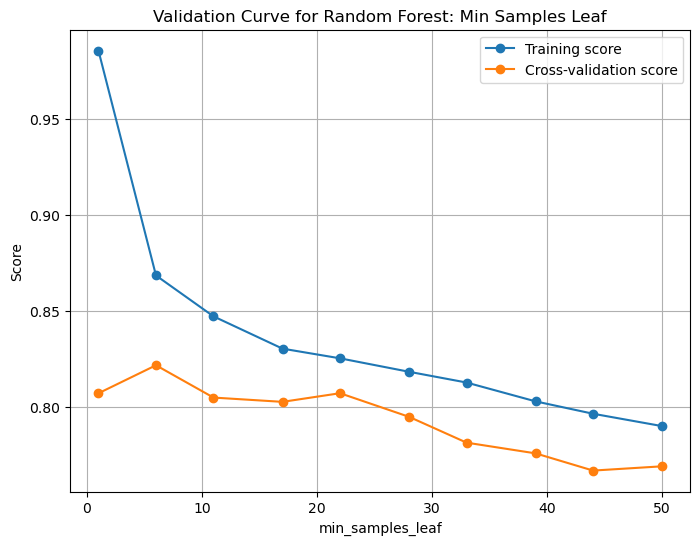

In [26]:
# Example setup for 'min_samples_leaf'
param_name = 'min_samples_leaf'
param_range = np.linspace(1, 50, 10, dtype=int)  # Leaf sizes from 1 to 50 in 10 steps

plot_validation_curve(estimator, "Validation Curve for Random Forest: Min Samples Leaf", X, y, param_name, param_range)


### Validierungskurven XG Boost

In [27]:
estimator = model3

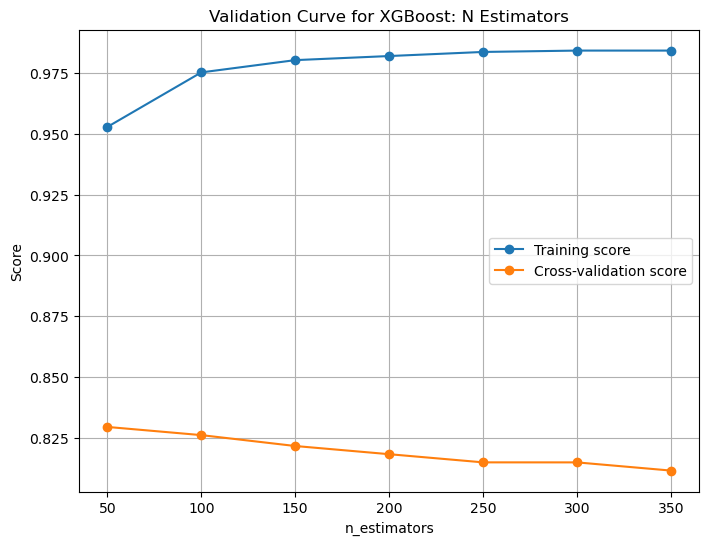

In [28]:
# Define the parameter range
param_name = 'n_estimators'
param_range = np.arange(50, 400, 50)  # From 50 to 350 trees

# Plot the validation curve
plot_validation_curve(estimator, "Validation Curve for XGBoost: N Estimators", X, y, param_name, param_range)

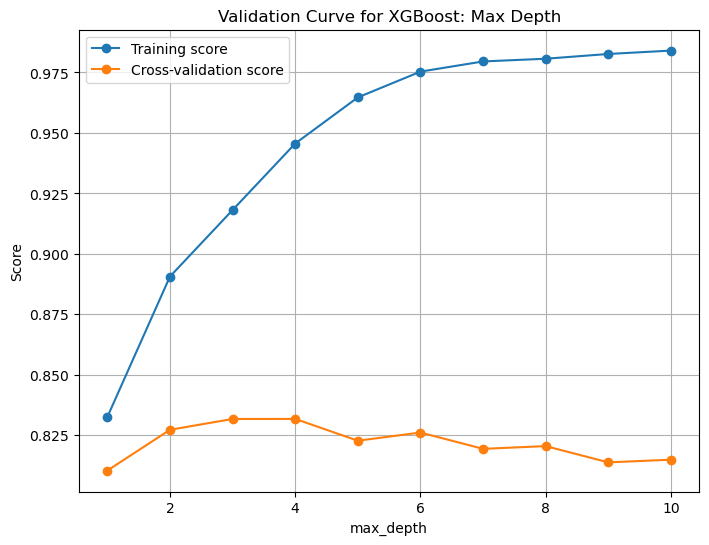

In [29]:
# Define the parameter range
param_name = 'max_depth'
param_range = np.arange(1, 11)  # Depths from 1 to 10

# Plot the validation curve
plot_validation_curve(estimator, "Validation Curve for XGBoost: Max Depth", X, y, param_name, param_range)


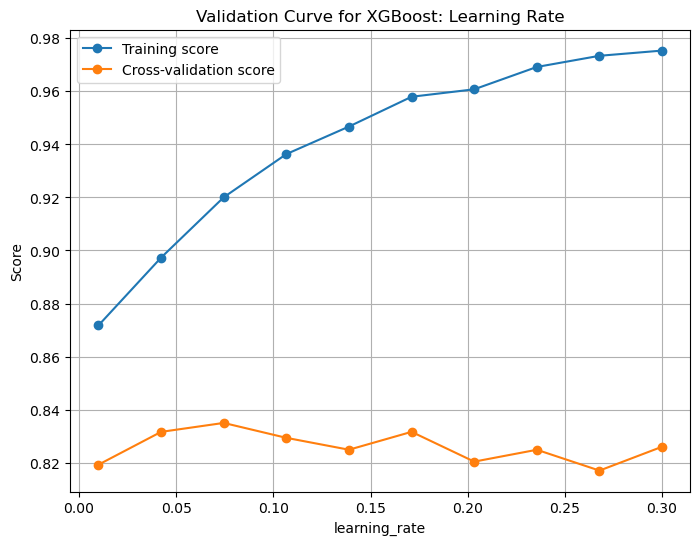

In [30]:
# Define the parameter range
param_name = 'learning_rate'
param_range = np.linspace(0.01, 0.3, 10)  # Learning rates from 0.01 to 0.3

# Plot the validation curve
plot_validation_curve(estimator, "Validation Curve for XGBoost: Learning Rate", X, y, param_name, param_range)


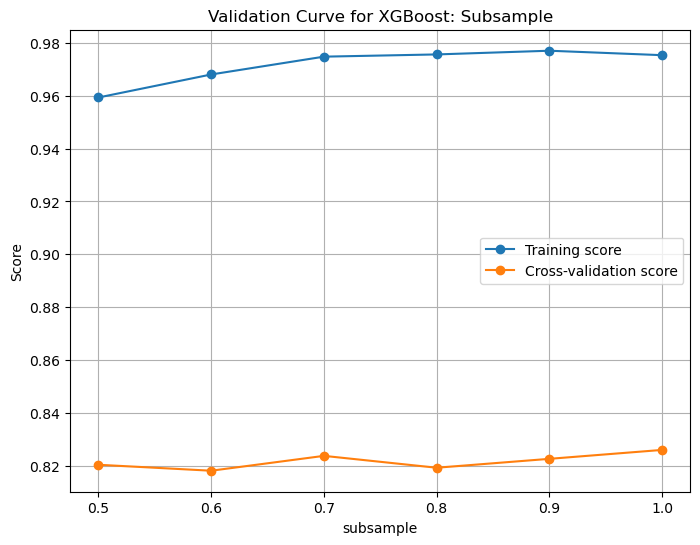

In [31]:
# Define the parameter range
param_name = 'subsample'
param_range = np.linspace(0.5, 1.0, 6)  # Fraction of samples from 50% to 100%

# Plot the validation curve
plot_validation_curve(estimator, "Validation Curve for XGBoost: Subsample", X, y, param_name, param_range)


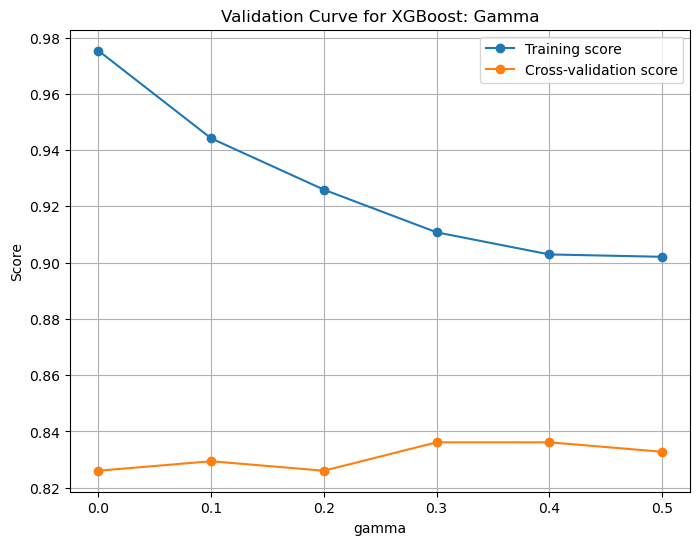

In [32]:
# Define the parameter range
param_name = 'gamma'
param_range = np.linspace(0, 0.5, 6)  # Gamma values from 0 to 0.5

# Plot the validation curve
plot_validation_curve(estimator, "Validation Curve for XGBoost: Gamma", X, y, param_name, param_range)


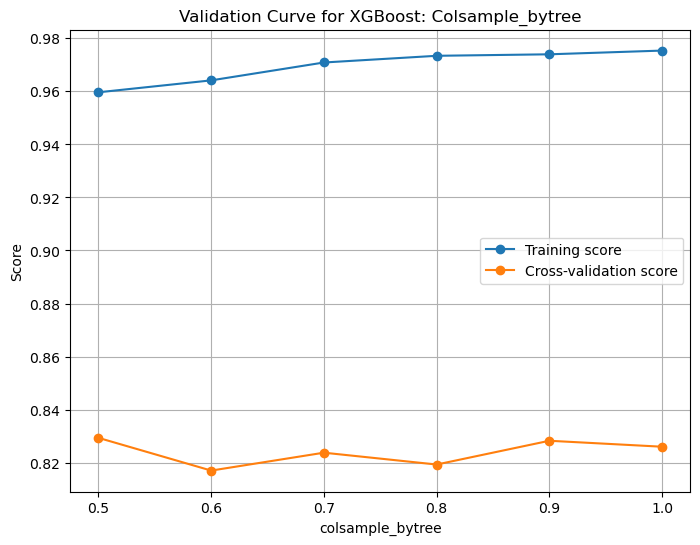

In [33]:
# Define the parameter range
param_name = 'colsample_bytree'
param_range = np.linspace(0.5, 1.0, 6)  # Fraction of features from 50% to 100%

# Plot the validation curve
plot_validation_curve(estimator, "Validation Curve for XGBoost: Colsample_bytree", X, y, param_name, param_range)
